# D200, Problem Set 1: Introduction to PyTorch

Due: 5 Feb 2026 [here](https://classroom.github.com/a/kQo2Kl0l) in
groups of up to 2 (solo or one partner).

Stefan Bucher

This problem set introduces PyTorch, the deep learning framework we will
use throughout the course. You will learn to work with tensors, use
automatic differentiation, implement a training loop, and build a neural
network.

In [21]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim

**(1a)** Create the following tensors and perform the specified
operations:

1.  Create a tensor `a` containing the values \[1.0, 2.0, 3.0, 4.0,
    5.0\]
2.  Create a 3×3 tensor `B` filled with ones
3.  Reshape `a` to a 5×1 column vector
4.  Compute the element-wise square of `a`
5.  Compute the matrix product of `B` with itself

In [ ]:


#Create a tensor `a` containing the values \[1.0, 2.0, 3.0, 4.0,5.0\]
a = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

#Create a 3×3 tensor `B` filled with ones
B = torch.ones((3, 3)) #torch.ones creates a tensor filled with the value 1. The argument (3, 3) specifies the shape of the tensor, which in this case is a 3×3 matrix.

print(a, B)

#Reshape `a` to a 5×1 column vector
a = a.view(-1, 1) # or a = a.unsqueeze(1)
#it forces the tensor to have one column and as many rows as needed to accommodate all elements, effectively reshaping it to a 5×1 column vector.
#a.viesw(-1, 1) is a common way to reshape a tensor in PyTorch, where -1 indicates that the size of that dimension should be inferred based on the total number of elements and the other specified dimensions.
#a.unsqueeze(1) adds a new dimension at the specified position (in this case, position 1), effectively converting the 1D tensor into a 2D column vector.

#Compute the element-wise square of `a`
a = a ** 2

#Compute the matrix product of `B` with itself
B_product = torch.mm(B, B) #or B_product = B @ B
#torch.mm performs matrix multiplication between two tensors, while the @ operator is a shorthand for matrix multiplication in PyTorch.

print(a, B_product)


tensor([1., 2., 3., 4., 5.]) tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 1.],
        [ 4.],
        [ 9.],
        [16.],
        [25.]]) tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


**(1b)** PyTorch’s automatic differentiation (autograd) computes
gradients automatically. Consider the function $f(x) = x^2 + 3x + 1$.

1.  Compute $\frac{df}{dx}$ analytically. What is its value at $x = 2$?

Analytic derivative: df/dx = 2x + 3
At x = 2: df/dx = 2*(2) + 3 = 7


2.  Create a tensor `x = torch.tensor([2.0], requires_grad=True)` and
    compute `y = x**2 + 3*x + 1`
3.  Call `y.backward()` to compute the gradient, then print `x.grad`
4.  Verify that PyTorch’s gradient matches your analytical result

In [6]:
x = torch.tensor([2.0], requires_grad=True)
y = x**2 + 3*x + 1

print(x)
print(y)

y.backward()
print(x.grad)

tensor([2.], requires_grad=True)
tensor([11.], grad_fn=<AddBackward0>)
tensor([7.])


Here, we register x as a tensor equals to 2, and so when we compute y(x), python directly takes the value we have for x, which is equal to 2 and y(2)=11.

We set requires_grad = True so that all operations on the tensor are recorded

Calling backward computes the derivative.

If you want the clean numeric print: 

print(y.item()) or print(y.detach().item()) to get the scalar value 11.0
print(x.grad) after y.backward() to see the gradient tensor (tensor([7.]))

**(1c)** Consider the function $g(x, y) = x^2 y + y^3$.

1.  Compute $\frac{\partial g}{\partial x}$ and
    $\frac{\partial g}{\partial y}$ analytically

    $\frac{\partial g}{\partial x} = 2xy$ 

    $\frac{\partial g}{\partial y}= x^2 + 3y^2$

2.  Use PyTorch to compute both partial derivatives at $(x, y) = (1, 2)$
3.  Verify the results match

In [10]:
# Define variables with gradient tracking
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

# Define the function
g = x**2 * y + y**3

# Compute gradients
g.backward()

# Extract partial derivatives
dg_dx = x.grad
dg_dy = y.grad

dg_dx, dg_dy



(tensor(4.), tensor(13.))


# Problem 2: Linear Regression in PyTorch

In this problem, you will implement linear regression using PyTorch’s
neural network modules and optimizers.

In [12]:
# Generate synthetic data for linear regression
n_samples = 100
true_weight = 3.5
true_bias = 1.2

X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

print(X[:5], y[:5])

tensor([[ 1.3406],
        [ 0.7217],
        [ 0.5679],
        [-0.0726],
        [-0.5364]]) tensor([[ 5.6201],
        [ 3.4060],
        [ 3.1505],
        [ 0.9540],
        [-0.8389]])


**(2a)** Visualize the data, then create a linear regression model using
`nn.Linear`. This module implements $\hat{y} = Wx + b$ where $W$
(weight) and $b$ (bias) are learnable parameters.

1.  Create a model: `model = nn.Linear(in_features=1, out_features=1)`
2.  Print the initial (random) weight and bias using `model.weight` and
    `model.bias`
3.  Make predictions on `X` using `model(X)` and plot them alongside the
    true data

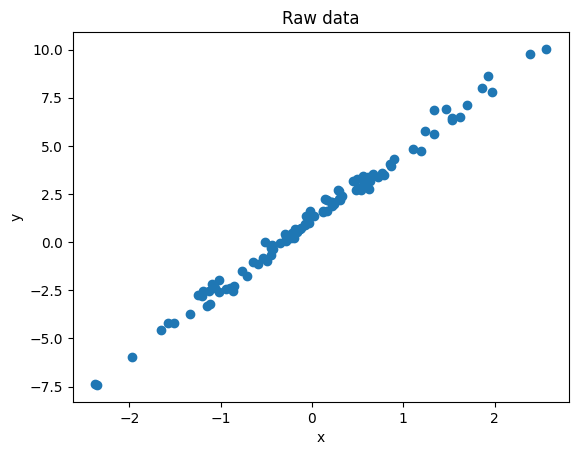

In [14]:
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw data")
plt.show()

Parameter containing:
tensor([[0.7075]], requires_grad=True) Parameter containing:
tensor([-0.3395], requires_grad=True)


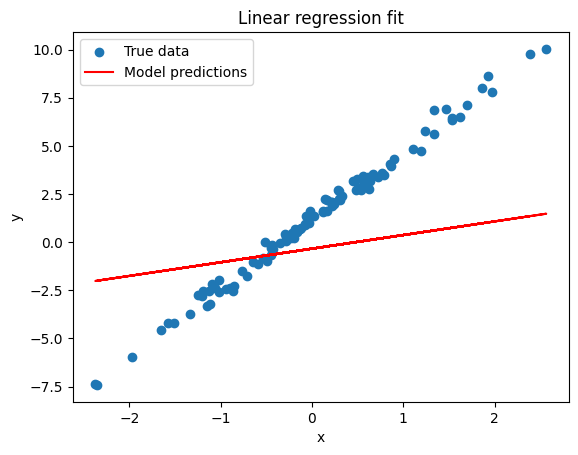

In [22]:

model = nn.Linear(in_features=1, out_features=1)

print(model.weight, model.bias)

with torch.no_grad():          # no gradients needed for prediction
    y_pred = model(X)  # X_tensor shape: (n, 1)


plt.scatter(X, y, label="True data")
plt.plot(X, y_pred.numpy(), color="red", label="Model predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear regression fit")
plt.show()



The prediction is really bad because nn.Linear starts with randomly initialized weight and bias, so the prediction is just a random line. It's an untrained regression (no gradients needed for prediction).

**(2b)** Implement the training loop to fit the model. Use:

-   Loss function: `nn.MSELoss()`
-   Optimizer: `optim.SGD(model.parameters(), lr=0.1)`
-   Train for 100 epochs

The training loop should follow this pattern:

``` python
for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    # 2. Compute loss
    # 3. Zero gradients: optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    # 5. Update parameters: optimizer.step()
```

Store the loss at each epoch and plot the loss curve.

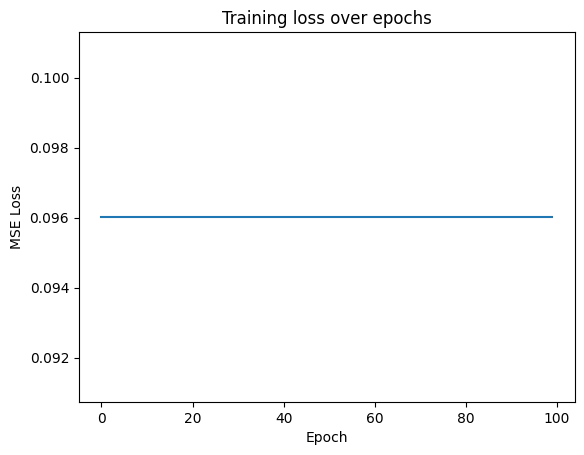

Final loss: 0.09602050483226776
SGD learned slope (w): 3.534924
SGD learned intercept (b): 1.176394


In [29]:
# Loss + optimizer (as required)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)# Stochastic Gradient Descent (SGD) optimizer with learning rate 0.1

# Training
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    # 1) Forward pass: compute predictions
    y_pred = model(X) 

    # 2) Compute loss
    loss = criterion(y_pred, y)#criterion computes the mean squared error (MSE) loss between the predicted values y_pred and the true values y. The MSE loss is calculated as the average of the squared differences between the predicted and true values, providing a measure of how well the model's predictions match the actual data.

    # 3) Zero gradients
    optimizer.zero_grad() #optimizer.zero_grad() is used to reset the gradients of all model parameters to zero before performing the backward pass. This is necessary because, by default, PyTorch accumulates gradients on subsequent backward passes. If you don't call optimizer.zero_grad(), the gradients from previous iterations will be added to the current gradients, which can lead to incorrect updates during optimization. By zeroing the gradients at the start of each training iteration, you ensure that only the gradients from the current iteration are used for updating the model parameters.

    # 4) Backward pass
    loss.backward() #loss.backward() computes the gradients of the loss with respect to all model parameters that have requires_grad=True. This is done using backpropagation, which efficiently computes the gradients by applying the chain rule of calculus through the computational graph of the model. After calling loss.backward(), the gradients for each parameter are stored in the .grad attribute of the respective parameter tensors, which can then be used by the optimizer to update the parameters in the direction that minimizes the loss.

    # 5) Update parameters
    optimizer.step() #optimizer.step() is used to update the model parameters based on the computed gradients. After calling loss.backward(), the gradients for each parameter are stored in their .grad attributes. When you call optimizer.step(), the optimizer uses these gradients to adjust the parameters according to the optimization algorithm (in this case, Stochastic Gradient Descent). The parameters are updated in the direction that minimizes the loss, which helps the model learn from the data over multiple iterations.

    # Store loss
    losses.append(loss.item()) #loss.item() is used to extract the scalar value of the loss from the tensor. The .item() method returns a standard Python number (e.g., float) from a single-element tensor, which is useful for logging or storing the loss values during training.

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training loss over epochs")
plt.show()

# print learned parameters
print("Final loss:", losses[-1])

w_sgd = model.weight.item()   # slope
b_sgd = model.bias.item()     # intercept
print(f"SGD learned slope (w): {w_sgd:.6f}")
print(f"SGD learned intercept (b): {b_sgd:.6f}")

**(2c)** After training:

1.  Print the learned weight and bias
2.  Compute the analytical OLS solution:
    $\hat{\beta} = (X^\top X)^{-1} X^\top y$ (hint: add a column of ones
    for the intercept)
3.  Compare the SGD estimates to both the OLS solution and the true
    values (3.5 and 1.2)
4.  Plot the learned regression line alongside the data

OLS slope: 3.534925
OLS intercept: 1.176394

Comparison (estimate -> error):
SGD: slope 3.534924 (err +0.034924), intercept 1.176394 (err -0.023606)
OLS: slope 3.534925 (err +0.034925), intercept 1.176394 (err -0.023606)
True: slope 3.500000, intercept 1.200000


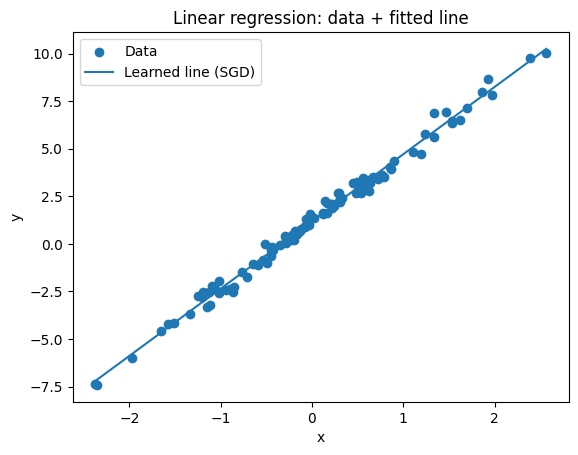

In [25]:

# --- 2) Analytical OLS solution with intercept ---

ones = torch.ones_like(X)                 # (n, 1)
X_design = torch.cat([ones, X], dim=1)    # (n, 2) = [1, x]

# beta_hat = (X'X)^(-1) X'y
XtX = X_design.T @ X_design                      # (2, 2)
Xty = X_design.T @ y                      # (2, 1)
beta_ols = torch.linalg.solve(XtX, Xty)          # (2, 1) more stable than explicit inverse

b_ols = beta_ols[0].item()   # intercept
w_ols = beta_ols[1].item()   # slope

print(f"OLS slope: {w_ols:.6f}")
print(f"OLS intercept: {b_ols:.6f}")

# --- 3) Compare to true values ---
w_true, b_true = 3.5, 1.2

print("\nComparison (estimate -> error):")
print(f"SGD: slope {w_sgd:.6f} (err {w_sgd - w_true:+.6f}), intercept {b_sgd:.6f} (err {b_sgd - b_true:+.6f})")
print(f"OLS: slope {w_ols:.6f} (err {w_ols - w_true:+.6f}), intercept {b_ols:.6f} (err {b_ols - b_true:+.6f})")
print(f"True: slope {w_true:.6f}, intercept {b_true:.6f}")

# --- 4) Plot learned regression line alongside the data ---
# Sort X for a clean line plot
X_np = X.squeeze().detach().numpy()
y_np = y.squeeze().detach().numpy()

idx = X_np.argsort()
X_sorted = torch.tensor(X_np[idx], dtype=torch.float32).view(-1, 1)

with torch.no_grad():
    y_line = model(X_sorted).squeeze().numpy()

plt.scatter(X_np, y_np, label="Data")
plt.plot(X_sorted.squeeze().numpy(), y_line, label="Learned line (SGD)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression: data + fitted line")
plt.legend()
plt.show()

Here we save the intercept as a regressor that is always 1.
We compute the matrix operations.
We solve directly the linear system.

**(2d)** Compare SGD with the Adam optimizer (`optim.Adam`). Retrain the
model with both optimizers and plot their loss curves. Which converges
faster?

SGD  : 3.534918785095215 1.1763943433761597 final loss 0.09602050483226776
Adam : 3.5349173545837402 1.176395058631897 final loss 0.09602049738168716


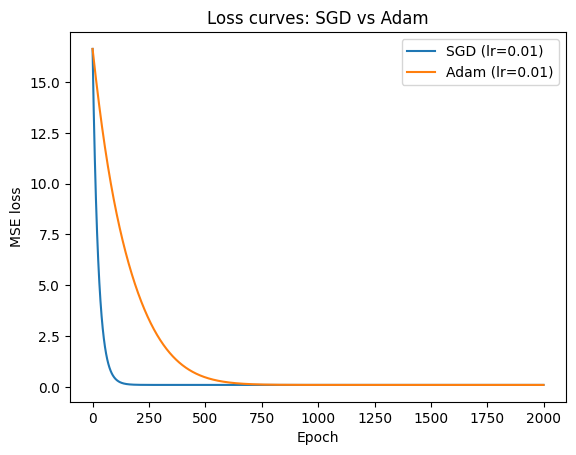

In [27]:
# should have done the reprocudibility from the begining to ensure same init for fair comparison. Let's do it now for Adam and compare.
# --- model definition  ---
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # slope + intercept

    def forward(self, x):
        return self.linear(x)

criterion = nn.MSELoss()

def train_with_optimizer(X, y, opt_name="sgd", lr=0.01, epochs=2000, seed=0):
    torch.manual_seed(seed)  # ensures same init for fair comparison
    model = LinearRegressionModel()
    
    if opt_name.lower() == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif opt_name.lower() == "adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        raise ValueError("opt_name must be 'sgd' or 'adam'")

    losses = []
    for _ in range(epochs):
        pred = model(X)
        loss = criterion(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    # extract learned params
    with torch.no_grad():
        w = model.linear.weight.item()
        b = model.linear.bias.item()

    return model, losses, w, b

# ---- run both trainings (same init seed!) ----
epochs = 2000
lr_sgd = 0.01
lr_adam = 0.01  # you can also try 0.05 for SGD or 0.01 for Adam; but start equal

model_sgd, losses_sgd, w_sgd, b_sgd = train_with_optimizer(X, y, "sgd", lr=lr_sgd, epochs=epochs, seed=123)
model_adam, losses_adam, w_adam, b_adam = train_with_optimizer(X, y, "adam", lr=lr_adam, epochs=epochs, seed=123)

print("SGD  :", w_sgd, b_sgd, "final loss", losses_sgd[-1])
print("Adam :", w_adam, b_adam, "final loss", losses_adam[-1])

# ---- plot loss curves ----
plt.figure()
plt.plot(losses_sgd, label=f"SGD (lr={lr_sgd})")
plt.plot(losses_adam, label=f"Adam (lr={lr_adam})")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Loss curves: SGD vs Adam")
plt.legend()
plt.show()


Here SGD converges faster.


# Problem 3: Multi-Layer Perceptron on MNIST

In this problem, you will build a multi-layer perceptron (MLP) to
classify handwritten digits from the MNIST dataset.

100%|██████████| 9.91M/9.91M [00:01<00:00, 8.90MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 330kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.77MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.72MB/s]


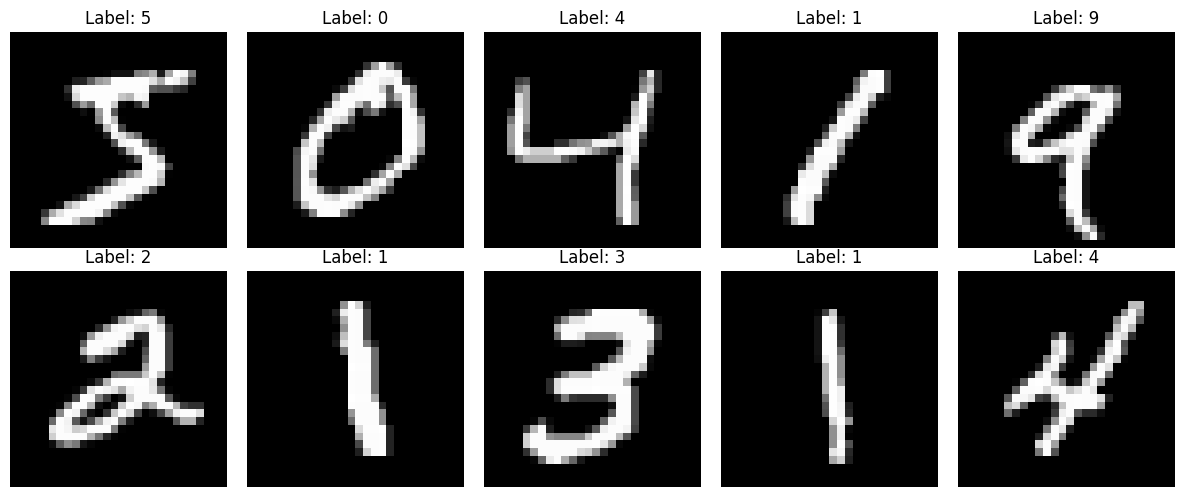

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#datasets gives you ready-to-use datasets
#transforms defines preprocessing steps applied to each image
#DataLoader handles batching, shuffling and itearation during ttraining/testing.

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

#defines how each image is transformed

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

#load the dataset into training set and test set


#for the training loader we shuffle the data so that there is random order for each epoch
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

Here, we have a preprocessing pipeline that converts the image in a PyTorch tensor. It then standardizes the data. It then creates mini-batches.

**(3a)** Build an MLP with the following architecture using
`nn.Sequential`:

-   Input: 784 features (28×28 flattened image)
-   Hidden layer 1: 256 units, ReLU activation
-   Hidden layer 2: 128 units, ReLU activation
-   Output: 10 units (one per digit class)

Print the model architecture and count the total number of parameters.

In [30]:
# Define the MLP
model = nn.Sequential(
    nn.Linear(784, 256),  # Input -> Hidden layer 1
    nn.ReLU(),
    nn.Linear(256, 128),  # Hidden layer 1 -> Hidden layer 2
    nn.ReLU(),
    nn.Linear(128, 10)    # Hidden layer 2 -> Output
)

# Print the model architecture
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)


In [31]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")


Total number of parameters: 235146



**(3b)** Train the model:

-   Loss function: `nn.CrossEntropyLoss()` (combines softmax and
    negative log-likelihood)
-   Optimizer: `optim.Adam(model.parameters(), lr=0.001)`
-   Train for 5 epochs

For each epoch, compute and print:

1.  Average training loss
2.  Training accuracy
3.  Test accuracy

Use this helper function to compute accuracy:

In [36]:
def compute_accuracy(model, data_loader):
    model.eval()  # Sets evaluation mode (disables dropout/batchnorm training behavior)
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)

            # Flatten: (batch, 1, 28, 28) -> (batch, 784)
            images = images.view(images.size(0), -1)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

This measure the classification accuracy

In [39]:
if torch.backends.mps.is_available():
    device = torch.device("mps")   # Apple Silicon GPU
else:
    device = torch.device("cpu")   # Fallback

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
train_accs = []
test_accs = []

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Flatten MNIST images
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / total
    train_acc = 100 * correct / total
    test_acc = compute_accuracy(model, test_loader)

    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)


    print(
        f"Epoch [{epoch+1}/{num_epochs}] | "
        f"Train Loss: {avg_train_loss:.4f} | "
        f"Train Acc: {train_acc:.2f}% | "
        f"Test Acc: {test_acc:.2f}%"
    )


Epoch [1/5] | Train Loss: 0.0291 | Train Acc: 98.99% | Test Acc: 97.50%
Epoch [2/5] | Train Loss: 0.0239 | Train Acc: 99.20% | Test Acc: 98.03%
Epoch [3/5] | Train Loss: 0.0227 | Train Acc: 99.24% | Test Acc: 97.58%
Epoch [4/5] | Train Loss: 0.0206 | Train Acc: 99.31% | Test Acc: 97.61%
Epoch [5/5] | Train Loss: 0.0188 | Train Acc: 99.38% | Test Acc: 98.03%


This moves all the model parameters (weights and biases from CPU to GPU). It resets the epoch statistics for each run. And it moves the batch to device. it flattens the images because Multi Layer Perceptron (MLP - simplest form of a neural network) expects vectors not images, with each pixel being a feature.

With zero_grad(), it clears old gradients. Loss.backward computes the derivative.
And optimizer.step() updates the parameters.

**(3c)** Evaluate and visualize:

1.  Plot the training loss and accuracies over epochs
2.  Display 10 test images with their predicted labels. Mark incorrect
    predictions in red.
3.  What test accuracy did you achieve? How does this compare to random
    guessing (10%)?

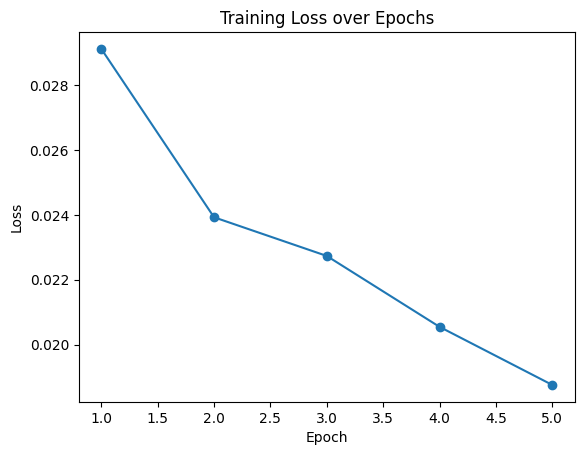

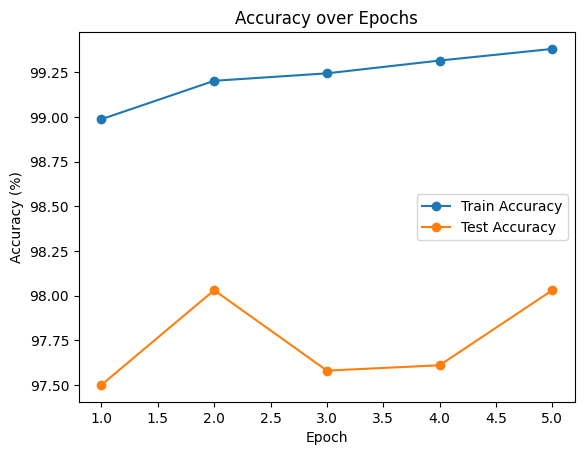

In [40]:
epochs = range(1, len(train_losses) + 1)

plt.figure()
plt.plot(epochs, train_losses, marker="o")
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs, train_accs, marker="o", label="Train Accuracy")
plt.plot(epochs, test_accs, marker="o", label="Test Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

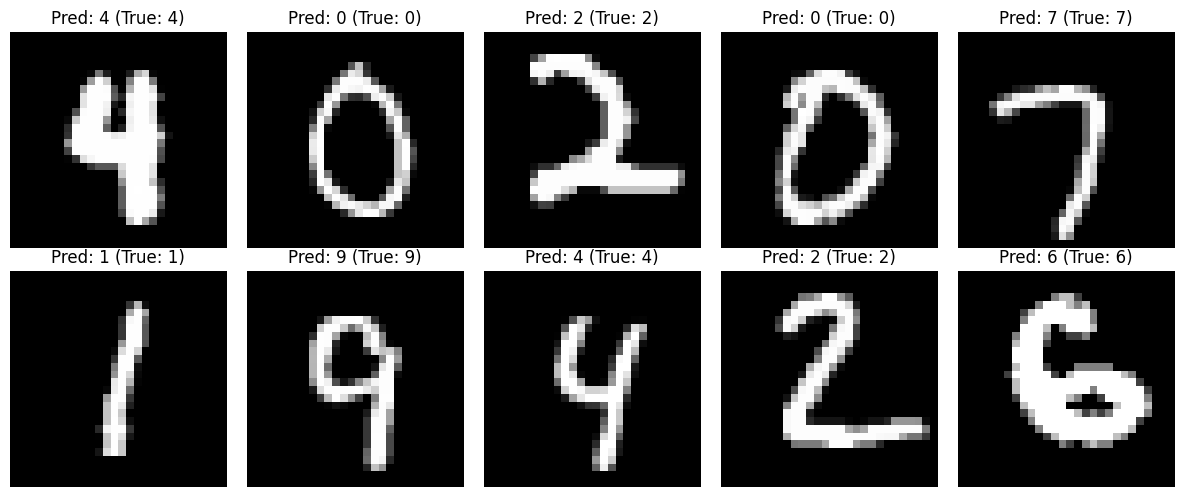

In [41]:
import numpy as np

model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# predict
flat = images.view(images.size(0), -1)
outputs = model(flat)
preds = outputs.argmax(dim=1)

# pick 10 examples
idx = np.random.choice(images.size(0), size=10, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, i in zip(axes.flat, idx):
    img = images[i].detach().cpu().squeeze()  # (28,28)
    true = labels[i].item()
    pred = preds[i].item()

    ax.imshow(img, cmap="gray")
    if pred == true:
        ax.set_title(f"Pred: {pred} (True: {true})")
    else:
        ax.set_title(f"Pred: {pred} (True: {true})", color="red")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [42]:
final_test_acc = test_accs[-1]
print(f"Final test accuracy: {final_test_acc:.2f}%")
print(f"Random guessing baseline: 10.00%")
print(f"Improvement over random: {final_test_acc/10:.1f}x")


Final test accuracy: 98.03%
Random guessing baseline: 10.00%
Improvement over random: 9.8x
